In [1]:
from util.import_all import *

## 1.1 Fighting the Curse of Dimensionality with Distributed Representations
In a nutshell, the idea of the proposed approach can be summarized as follows:

1. associate with each word in the vocabulary a distributed word feature vector (a real- valued vector in $\mathbb{R}^m$),
2. express the joint probability function of word sequences in terms of the feature vectors of these words in the sequence, and
3. learn simultaneously the word feature vectors and the parameters of that probability function.

The feature vector represents different aspects of the word: each word is associated with a point in a vector space. The number of features (e.g. $m = 30, 60, 100$ in the experiments) is much smaller than the size of the vocabulary (e.g. $17000$). The probability function is expressed as a product of conditional probabilities of the next word given the previous ones, (e.g. using a multi- layer neural network to predict the next word given the previous ones, in the experiments). This function has parameters that can be iteratively tuned in order to maximize the log-likelihood of the training data or a regularized criterion, e.g. by adding a weight decay penalty. The feature vectors associated with each word are learned, but they could be initialized using prior knowledge of semantic features.


In [2]:
NUM_FEATURES_POTENTIAL_VALUES = [30, 60, 100]
NUM_FEATURES = NUM_FEATURES_POTENTIAL_VALUES[0]

VOCAB_SIZE = 17000

## Building the Vocabulary using n-grams

In [3]:
with open("data/tinyshakespeare.txt") as f:
    text: str = f.read()

lines = text.splitlines()
print("Lines:", len(lines))

# Removes empty lines and adds newline char to the end of each line
lines = [line + "\n" for line in lines if len(line) > 0]
print("Lines after removing empty lines:", len(lines))

admissable_symbols = set("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 \n-':;,.!?")

# Filters out:
"""
2342 Senators, &C: 10 &
2359 Senators, &C: 10 &
19711 England and France, and lord of Ireland, &c. 41 &
19801 Now stops thy spring; my sea sha$l suck them dry, 32 $
"""
lines: list[str] = [line for line in lines if all(c in admissable_symbols for c in line)]

text = "\n".join(lines)
text = text.replace("\n\n", "\n")

Lines: 40000
Lines after removing empty lines: 32777


In [16]:
def get_ngrams(text, n) -> dict[str, int]:
    ngrams: dict[str, int] = {}
    for i in range(len(text) - n + 1):
        ngram: str = "".join(text[i:i+n])
        ngrams[ngram] = ngrams.get(ngram, 0) + 1
    return ngrams

vocab: dict[str, int] = get_ngrams(text, 2)
vocab = {k: v for k, v in sorted(vocab.items(), key=lambda x: x[1], reverse=True)}

charset: list[str] = list(set(w[0] for w in vocab.keys()))
charset_amount = {c: len([w for w in vocab.keys() if w[0] == c]) for c in charset}
charset_amount = {k: v for k, v in sorted(charset_amount.items(), key=lambda x: x[1], reverse=True)}

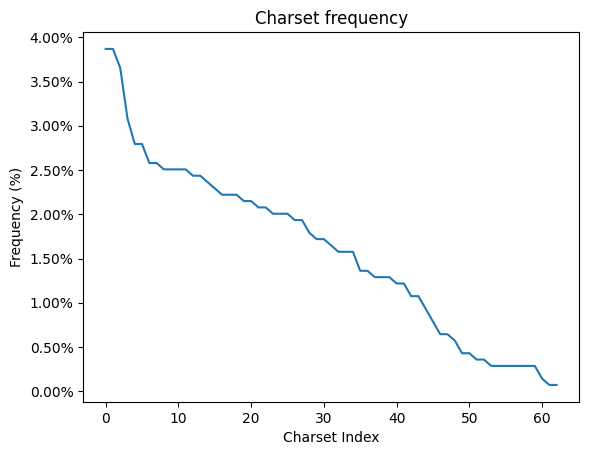

In [110]:
total_chars = sum(charset_amount.values())
plt.plot(range(len(charset_amount)), [val / total_chars * 100 for val in charset_amount.values()])

plt.title("Charset frequency")
plt.xlabel("Charset Index")
plt.ylabel("Frequency (%)")

formatter = plt.FuncFormatter(lambda x, _: f"{x:.2f}%")
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

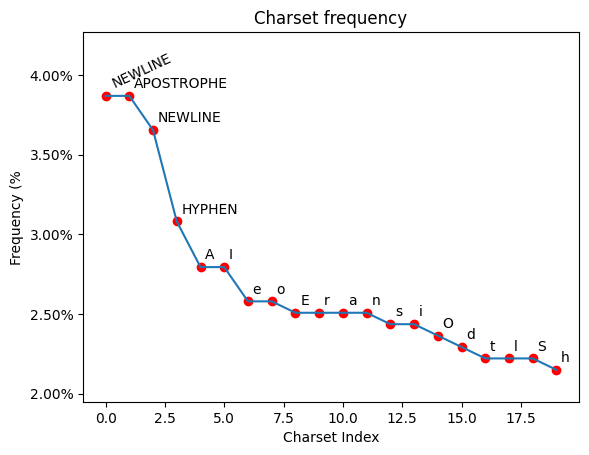

In [109]:
NUM_CHARS = 20

PLOT_KEYS = list(charset_amount.keys())[:NUM_CHARS]
PLOT_VALUES = [val / total_chars * 100 for val in list(charset_amount.values())[:NUM_CHARS]]


plt.plot(range(len(PLOT_KEYS)), PLOT_VALUES)

for i, (k, v) in enumerate(zip(PLOT_KEYS, PLOT_VALUES)):
    rotation = 0
    if k == " ":
        text = "NEWLINE"
        rotation = 25
    elif k == "'":
        text = "APOSTROPHE"
    elif k == "\n":
        text = "NEWLINE"
    elif k == "-":
        rotation = 0
        text = "HYPHEN"
    else:
        text: str = k
    plt.text(i + 0.2, v + 0.05, text, rotation = rotation)
    plt.scatter(i, v, color="red")


plt.ylim(min(PLOT_VALUES) - 0.2, max(PLOT_VALUES) + 0.4)
plt.title("Charset frequency")
plt.xlabel("Charset Index")
plt.ylabel("Frequency (%")

formatter = plt.FuncFormatter(lambda x, _: f"{x:.2f}%")
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

In [114]:
import itertools
charset_limited = charset[:25]


{'e ': 27643,
 ' t': 23835,
 'th': 22737,
 'he': 18202,
 't ': 16508,
 's ': 15363,
 'd ': 14161,
 ', ': 14094,
 ' a': 13539,
 'ou': 12730,
 ' s': 12282,
 ' h': 11925,
 'er': 11771,
 ' m': 10785,
 'in': 10605,
 ' w': 10546,
 'r ': 10516,
 'y ': 10281,
 'an': 10192,
 're': 9842,
 'ha': 9672,
 'nd': 9302,
 ':\n': 8760,
 'n ': 8737,
 ' b': 8463,
 'or': 8455,
 'at': 8337,
 'o ': 8134,
 'en': 7566,
 'is': 7526,
 ' o': 7409,
 ' i': 7166,
 'ar': 7081,
 'hi': 6991,
 'st': 6822,
 '.\n': 6675,
 ' f': 6563,
 'es': 6478,
 'on': 6435,
 'll': 6357,
 'ea': 6287,
 'me': 6135,
 'it': 6114,
 've': 5986,
 'to': 5857,
 'se': 5506,
 ',\n': 5504,
 ' d': 5477,
 'l ': 5409,
 ' c': 5404,
 'ur': 5313,
 'no': 5209,
 'ho': 5199,
 ' n': 5176,
 ' l': 5172,
 ' y': 5140,
 'ng': 5138,
 'h ': 5117,
 'yo': 4728,
 'f ': 4681,
 ' p': 4490,
 'te': 4433,
 'le': 4423,
 'I ': 4342,
 'al': 4149,
 '\nT': 4142,
 ' I': 4078,
 'ot': 4060,
 'ow': 3963,
 'be': 3959,
 'ne': 3920,
 'as': 3893,
 'wi': 3865,
 'e,': 3838,
 'of': 3835,
 '

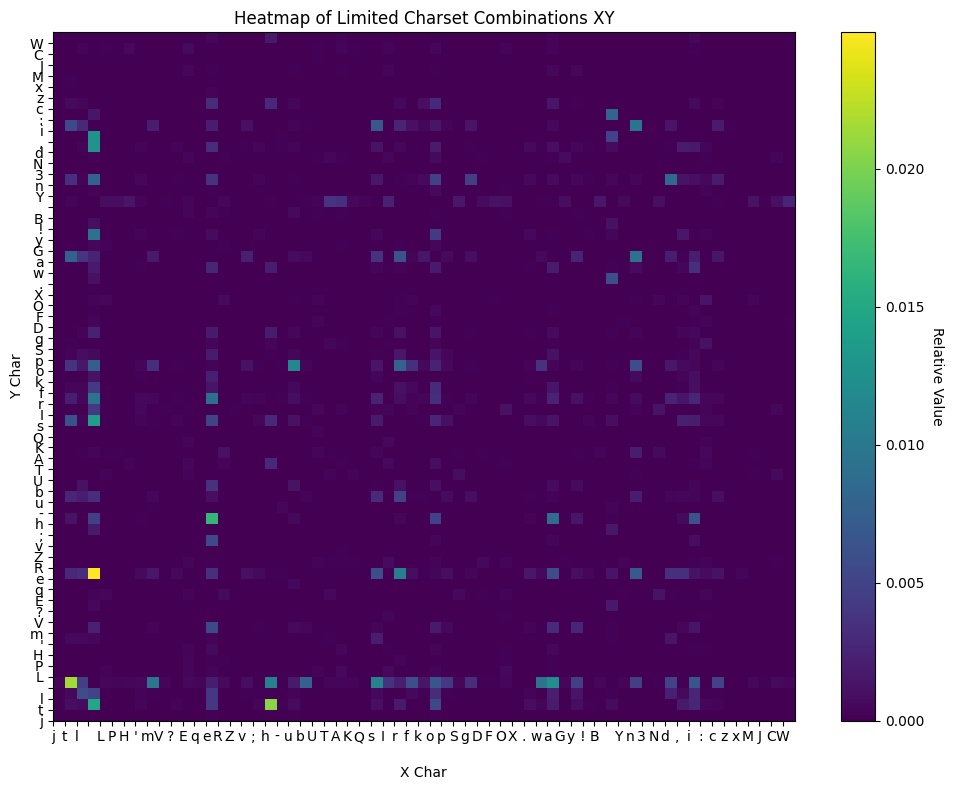

In [121]:
PLOT_NUMBER = 200
charset_limited = charset[:PLOT_NUMBER]

# Calculate the total number of entries in the vocab map
total_entries = sum(vocab.values())

# Create all possible combinations of the limited charset
combinations = list(itertools.product(charset_limited, repeat=2))

# Create a 2D array to store the relative values
values = np.zeros((len(charset_limited), len(charset_limited)))

# Fill the 2D array with the relative values
for i, (char1, char2) in enumerate(combinations):
    key = char1 + char2
    value = vocab.get(key, 0) / total_entries
    row, col = charset_limited.index(char1), charset_limited.index(char2)
    values[row, col] = value

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.pcolormesh(values, cmap='viridis')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Relative Value", rotation=-90, va="bottom")

# Add x and y ticks
ax.set_xticks(np.arange(len(charset_limited)))
ax.set_yticks(np.arange(len(charset_limited)))
ax.set_xticklabels(charset_limited)
ax.set_yticklabels(charset_limited)

# Add title and axis labels
ax.set_title("Heatmap of Limited Charset Combinations XY")
ax.set_xlabel("X Char")
ax.set_ylabel("Y Char")

plt.tight_layout()
plt.show()

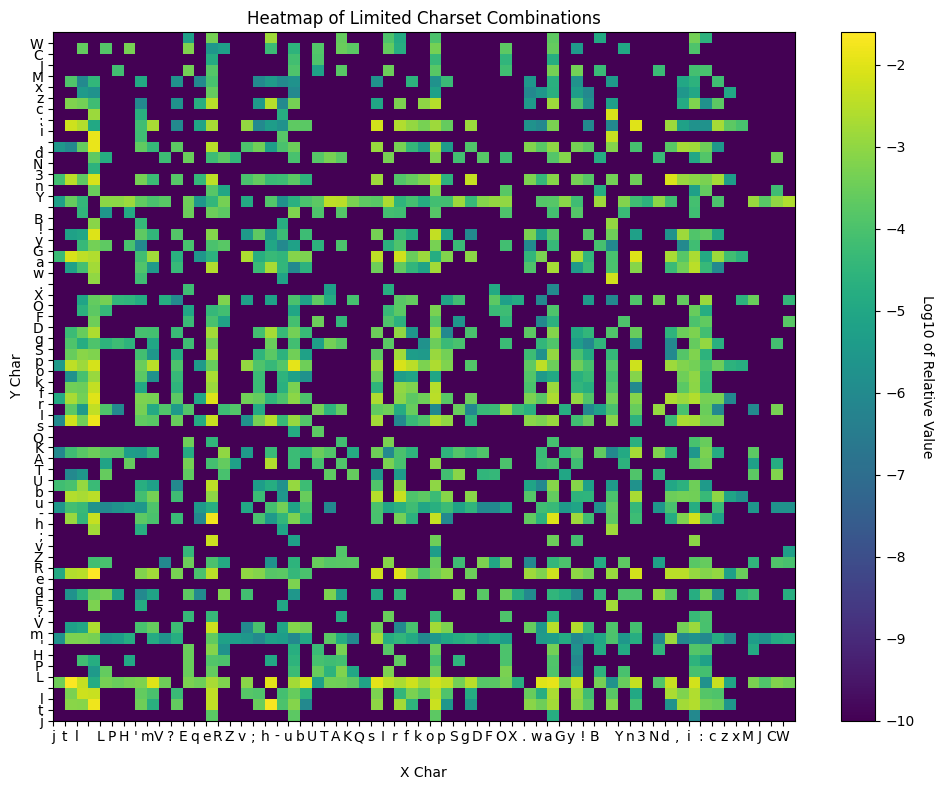

In [124]:
# Calculate the total number of entries in the vocab map
total_entries = sum(vocab.values())

# Create all possible combinations of the limited charset
combinations = list(itertools.product(charset_limited, repeat=2))

# Create a 2D array to store the relative values
values = np.zeros((len(charset_limited), len(charset_limited)))

# Fill the 2D array with the relative values
for i, (char1, char2) in enumerate(combinations):
    key = char1 + char2
    value = vocab.get(key, 0) / total_entries
    row, col = charset_limited.index(char1), charset_limited.index(char2)
    values[row, col] = value

# Apply logarithmic transformation to the values
values = np.log10(values + 1e-10)  # Adding a small constant to avoid log(0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.pcolormesh(values, cmap='viridis')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Log10 of Relative Value", rotation=-90, va="bottom")

# Add x and y ticks
ax.set_xticks(np.arange(len(charset_limited)))
ax.set_yticks(np.arange(len(charset_limited)))
ax.set_xticklabels(charset_limited)
ax.set_yticklabels(charset_limited)

# Add title and axis labels
ax.set_title("Heatmap of Limited Charset Combinations")
ax.set_xlabel("X Char")
ax.set_ylabel("Y Char")

plt.tight_layout()
plt.show()

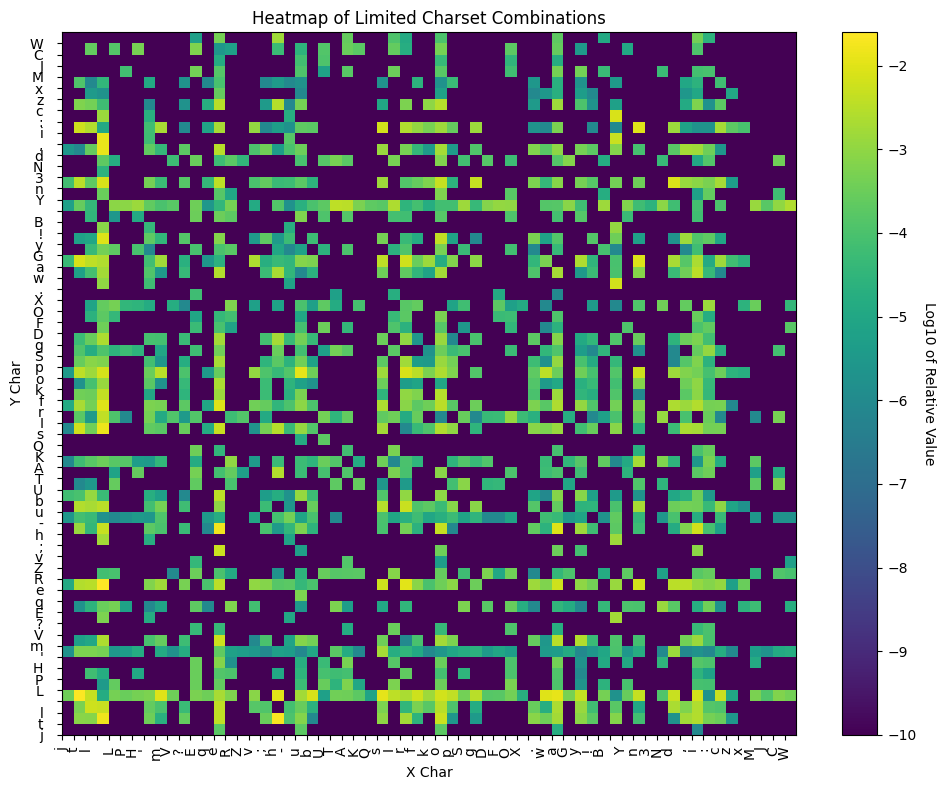

In [125]:
# Calculate the total number of entries in the vocab map
total_entries = sum(vocab.values())

# Create all possible combinations of the limited charset
combinations = list(itertools.product(charset_limited, repeat=2))

# Create a 2D array to store the relative values
values = np.zeros((len(charset_limited), len(charset_limited)))

# Fill the 2D array with the relative values
for i, (char1, char2) in enumerate(combinations):
    key = char1 + char2
    value = vocab.get(key, 0) / total_entries
    row, col = charset_limited.index(char1), charset_limited.index(char2)
    values[row, col] = value

# Apply logarithmic transformation to the values
values = np.log10(values + 1e-10)  # Adding a small constant to avoid log(0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.pcolormesh(values, cmap='viridis')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Log10 of Relative Value", rotation=-90, va="bottom")

# Add x and y ticks
ax.set_xticks(np.arange(len(charset_limited)))
ax.set_yticks(np.arange(len(charset_limited)))
ax.set_xticklabels(charset_limited)
ax.set_yticklabels(charset_limited)

# Adjust the position of x and y tick labels
ax.tick_params(axis='x', labelrotation=90, pad=5)  # Rotate x-tick labels by 90 degrees and move them down slightly
ax.tick_params(axis='y', labelleft=True, labelright=False, pad=10)  # Move y-tick labels to the right

# Add title and axis labels
ax.set_title("Heatmap of Limited Charset Combinations")
ax.set_xlabel("X Char")
ax.set_ylabel("Y Char")

plt.tight_layout()
plt.show()

In [126]:
total_entries = sum(vocab.values())

# Create all possible combinations of the limited charset
combinations = list(itertools.product(charset_limited, repeat=2))

# Create a 2D array to store the relative values
values = np.zeros((len(charset_limited), len(charset_limited)))

# Fill the 2D array with the relative values
for i, (char1, char2) in enumerate(combinations):
    key = char1 + char2
    value = vocab.get(key, 0) / total_entries
    row, col = charset_limited.index(char1), charset_limited.index(char2)
    values[row, col] = value

# Apply logarithmic transformation to the values
values = np.log10(values + 1e-10)  # Adding a small constant to avoid log(0)

# Create the heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.pcolormesh(values, cmap='viridis')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Log10 of Relative Value", rotation=-90, va="bottom")

# Add x and y ticks
ax.set_xticks(np.arange(len(charset_limited)))
ax.set_yticks(np.arange(len(charset_limited)))
ax.set_xticklabels(charset_limited)
ax.set_yticklabels(charset_limited)

# Adjust the position of x and y tick labels
ax.tick_params(axis='x', labelrotation=0, pad=10)  # Move x-tick labels to the right
ax.tick_params(axis='y', labelleft=False, labelright=True, pad=-10)  # Move y-tick labels up

# Add title and axis labels
ax.set_title("Heatmap of Limited Charset Combinations")
ax.set_xlabel("X Char")
ax.set_ylabel("Y Char")

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2738210901.py, line 1)